# PAGLIARA--RIGHI Neo
# M1 OIVM

                             Nombre d'observations   Moyenne  Écart-type  \
Poids_poulet_g                               200.0  2509.580  898.436875   
Nourriture_consommee_g_jour                  200.0   129.745   44.006166   
Temperature_enclos_C                         200.0    28.389    2.065724   

                             Minimum  1er quartile  Médiane  3e quartile  \
Poids_poulet_g                 821.0       1810.75   2481.5      3356.50   
Nourriture_consommee_g_jour     51.0         95.75    135.5       165.25   
Temperature_enclos_C            25.0         26.60     28.5        30.30   

                             Maximum       Variance  
Poids_poulet_g                3974.0  807188.817688  
Nourriture_consommee_g_jour    199.0    1936.542688  
Temperature_enclos_C            31.9       4.267215  


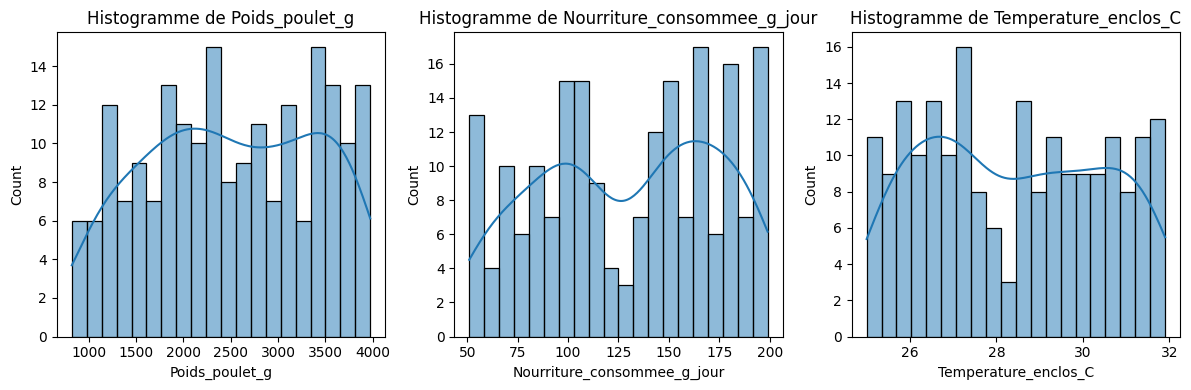

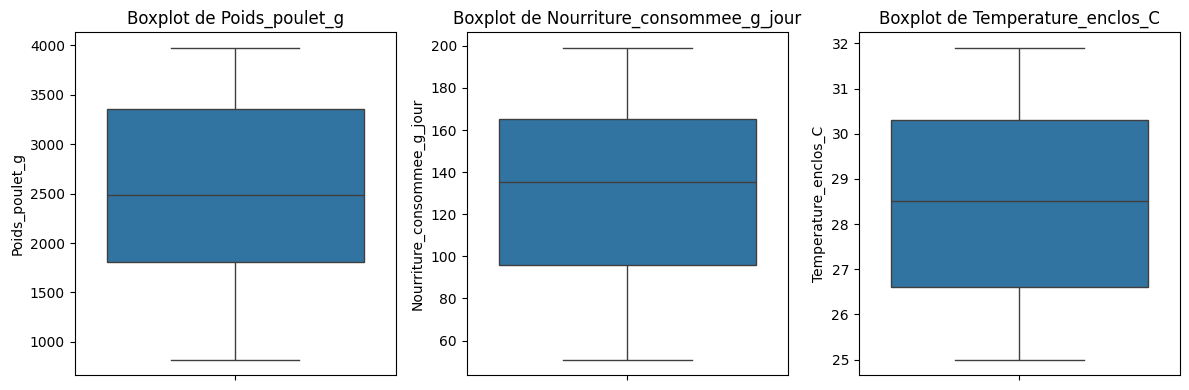

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data = pd.read_csv("donnees_elevage_poulet.csv")

# Sélectionner les variables d'intérêt
variables = ["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C"]

# Calculer les statistiques descriptives
stats = data[variables].describe().T
stats["variance"] = data[variables].var()


# Renommer les colonnes des statistiques en français
stats = stats.rename(columns={
    "count": "Nombre d'observations",
    "mean": "Moyenne",
    "std": "Écart-type",
    "min": "Minimum",
    "25%": "1er quartile",
    "50%": "Médiane",
    "75%": "3e quartile",
    "max": "Maximum",
    "variance": "Variance"
})

print(stats)

# Tracer les histogrammes
plt.figure(figsize=(12, 4))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f"Histogramme de {var}")
plt.tight_layout()
plt.show()

# Tracer les boxplots
plt.figure(figsize=(12, 4))
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[var])
    plt.title(f"Boxplot de {var}")
plt.tight_layout()
plt.show()


<span style="color : red">Que pouvez-vous déduire de ces graphiques ? Les données semblent-elles homogènes ou 
dispersées ?</span>


Les données sont généralement centrés autour de la médiane et de la moyenne, cela signifie que les données sont plutot homogènes.


Poids_poulet_g:
IQR : 1551.5
Outliers détectés pour Poids_poulet_g : []

Nourriture_consommee_g_jour:
IQR : 70.0
Outliers détectés pour Nourriture_consommee_g_jour : []

Temperature_enclos_C:
IQR : 3.6999999999999993
Outliers détectés pour Temperature_enclos_C : []


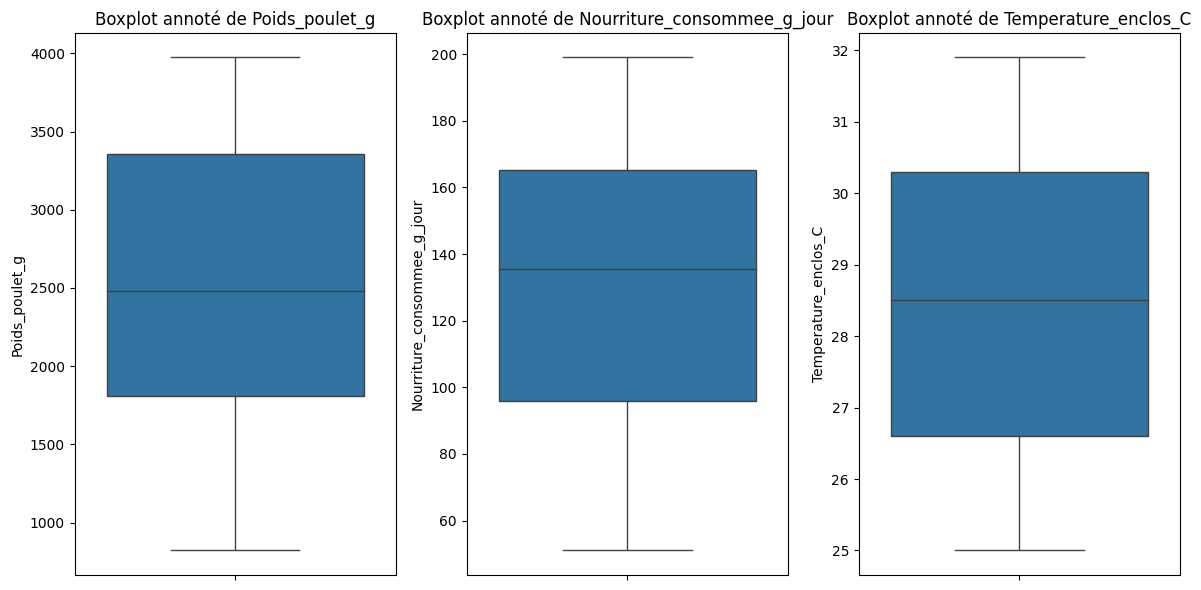

In [211]:
############### METHODE DE L'IQR ################

# Détection des outliers avec la méthode de l'IQR
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables):
    # Calcul des quartiles et de l'IQR
    Q1 = np.percentile(data[var], 25, interpolation='midpoint')  # Premier quartile (25%)
    Q3 = np.percentile(data[var], 75, interpolation='midpoint')  # Troisième quartile (75%)

    IQR = Q3 - Q1  # Intervalle interquartile

    # Définir les bornes pour détecter les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Détection des outliers (valeurs en dehors des bornes)
    outliers_iqr = data[(data[var] < lower_bound) | (data[var] > upper_bound)]
    print(f"\n{var}:")
    print(f"IQR : {IQR}")
    print(f"Outliers détectés pour {var} : {outliers_iqr[var].values}")

    # Tracer le boxplot
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[var])

    # Annotations pour les outliers détectés par IQR
    for outlier in outliers_iqr[var]:
        plt.text(0, outlier, f'{outlier:.2f}', horizontalalignment='center', size=10, color='red')

    plt.title(f"Boxplot annoté de {var}")

# Ajuster la disposition des subplots pour une meilleure présentation
plt.tight_layout()
plt.show()
    

    





Outliers détectés pour Poids_poulet_g (Méthode Z-Score) :
[]

Outliers détectés pour Nourriture_consommee_g_jour (Méthode Z-Score) :
[]

Outliers détectés pour Temperature_enclos_C (Méthode Z-Score) :
[]


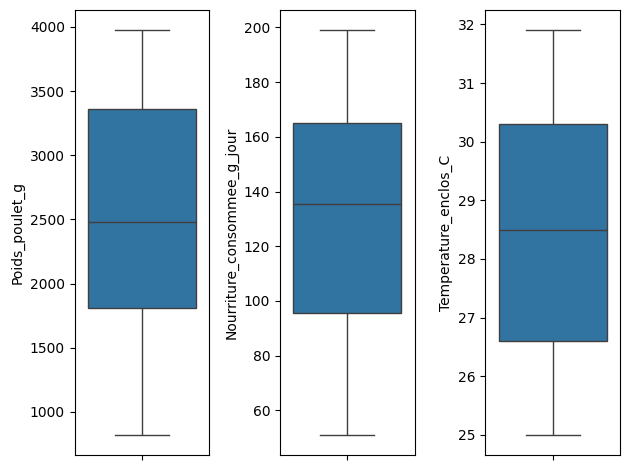

In [212]:
############### METHODE DU Z-SCORE ################
from scipy.stats import zscore

# Détection des outliers avec la méthode du Z-Score
threshold = 3  # Seuil pour considérer qu'une valeur est un outlier (ici, 3 écarts-types)
for i, var in enumerate(variables):
    # Calcul des Z-scores pour la variable
    z_scores = zscore(data[var])  

    # Détection des outliers (valeurs dont le Z-score > seuil)
    outliers_zscore = data[np.abs(z_scores) > threshold]

    # Affichage des résultats des outliers Z-score
    print(f"\nOutliers détectés pour {var} (Méthode Z-Score) :")
    print(outliers_zscore[var].values)

    # Tracer le boxplot
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[var])

    # Annotations pour les outliers détectés par Z-Score
    for outlier in outliers_zscore[var]:
        plt.text(0, outlier, f'{outlier:.2f}', horizontalalignment='center', size=10, color='blue')

# Ajuster la disposition des subplots pour une meilleure présentation
plt.tight_layout()
plt.show()

<span style="color : red">Les outliers détectés sont-ils réalistes ou issus d'erreurs de mesure ? 
Faut-il les exclure ou les garder ?</span>

Il n'y a pas d'outliers de détectés.

In [213]:
from scipy import stats

# Tester la normalité avec le test de Shapiro-Wilk
for var in variables:
    stat, p_value = stats.shapiro(data[var])
    
    print(f"\nTest de Shapiro-Wilk pour {var}:")
    print(f"Statistique de test : {stat}")
    print(f"p-value : {p_value}")
    
    # Interprétation du test
    if p_value < 0.05:
        print(f"Les données de {var} ne suivent pas une distribution normale (p-value < 0.05).")
    else:
        print(f"Les données de {var} suivent une distribution normale (p-value >= 0.05).")



Test de Shapiro-Wilk pour Poids_poulet_g:
Statistique de test : 0.9568221670349863
p-value : 9.098264233228524e-06
Les données de Poids_poulet_g ne suivent pas une distribution normale (p-value < 0.05).

Test de Shapiro-Wilk pour Nourriture_consommee_g_jour:
Statistique de test : 0.9448708208372757
p-value : 6.230563751996703e-07
Les données de Nourriture_consommee_g_jour ne suivent pas une distribution normale (p-value < 0.05).

Test de Shapiro-Wilk pour Temperature_enclos_C:
Statistique de test : 0.943209717135969
p-value : 4.4060638371198676e-07
Les données de Temperature_enclos_C ne suivent pas une distribution normale (p-value < 0.05).


Le test de Saphiro-Wilk indique que si la p-value est inférieure à un niveau alpha choisi (par exemple 0.05), alors l'hypothèse nulle est rejetée.
Si la p-value est supérieure au niveau alpha choisi (par exemple 0.05), alors on ne doit pas rejeter l'hypothèse nulle.


<span style="color : red"> # Expliquez ce que vous observez. </span>


On remarque qu'aucune donnée ne suit une distribution normale car elles sont toutes inférieures à 0.05, cela nous permet donc de conclure que l'on rejette l'hypothèse du test de Saphiro-Wilk.

In [214]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway

# Calcul de la médiane du poids des poulets pour créer deux groupes
median_poid = data['Poids_poulet_g'].median()
groupe_lourd = data[data['Poids_poulet_g'] >= median_poid]['Age_poulet_jours']
groupe_léger = data[data['Poids_poulet_g'] < median_poid]['Age_poulet_jours']

# Test t pour comparer les groupes en fonction du poids
t_stat, p_val = ttest_ind(groupe_léger, groupe_lourd)
print(f"\nTest t de Student pour comparer les groupes de poids:")
print(f"t-statistique = {t_stat:.3f}, p-value = {p_val:.3f}")
if p_val > 0.05:
    print("Pas de différence significative entre les groupes de poids")
else:
    print("Différence significative entre les groupes de poids")

# Création des groupes d'âge
data['Groupe_âge'] = pd.cut(data['Age_poulet_jours'], bins=3, labels=['Jeune', 'Adulte', 'Vieux'])

# Création des groupes basés sur les tranches d'âge
groupes_age = [data[data['Groupe_âge'] == age]['Poids_poulet_g'] for age in data['Groupe_âge'].unique()]

# ANOVA pour comparer les groupes d'âge en fonction du poids
f_stat, p_val = f_oneway(*groupes_age)
print(f"\nANOVA pour comparer les groupes d'âge:")
print(f"F-statistique = {f_stat:.3f}, p-value = {p_val:.3f}")
if p_val > 0.05:
    print("Pas de différence significative entre les groupes d'âge")
else:
    print("Différence significative entre les groupes d'âge")



Test t de Student pour comparer les groupes de poids:
t-statistique = 1.419, p-value = 0.158
Pas de différence significative entre les groupes de poids

ANOVA pour comparer les groupes d'âge:
F-statistique = 0.221, p-value = 0.802
Pas de différence significative entre les groupes d'âge


Matrice de covariance :
[[ 8.07188818e+05 -3.22367548e+03  3.53687236e+01]
 [-3.22367548e+03  1.93654269e+03 -1.68797035e+01]
 [ 3.53687236e+01 -1.68797035e+01  4.26721508e+00]]

Valeurs propres :
[8.07201724e+05 1.92378347e+03 4.11970613e+00]

Vecteurs propres :
[[-9.99991986e-01  4.00344651e-03 -8.99176910e-06]
 [ 4.00321591e-03  9.99953970e-01  8.71966200e-03]
 [-4.39000556e-05 -8.71955613e-03  9.99961983e-01]]

Composantes principales (projection sur les 2 premières composantes) :
               0          1
0   -1464.719460 -71.871815
1     849.662138  18.823857
2     415.801795  54.573739
3     579.500279 -21.071526
4     614.456100 -32.184110
..           ...        ...
195   403.717943  33.646290
196  -970.359236  17.124495
197  -965.547480 -29.903822
198   737.647044  15.276787
199   -58.522687 -25.528341

[200 rows x 2 columns]


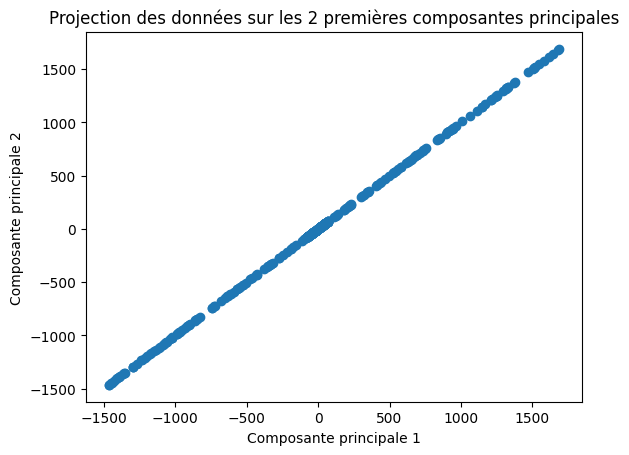

In [215]:
import pandas as pd
import numpy as np

# Charger les données
data = pd.read_csv("donnees_elevage_poulet.csv")

# Sélectionner les variables d'intérêt
variables = ["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C"]
data_selected = data[variables]

# 1. Centrer les données (soustraire la moyenne de chaque colonne)
mean = np.mean(data_selected, axis=0)
data_centered = data_selected - mean

# 2. Calculer la matrice de covariance
cov_matrix = np.cov(data_centered, rowvar=False)

# 3. Calculer les valeurs propres et les vecteurs propres
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# 4. Trier les valeurs propres et les vecteurs propres en fonction des valeurs propres (du plus grand au plus petit)
sorted_indices = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[sorted_indices]
eigvecs_sorted = eigvecs[:, sorted_indices]

# 5. Projeter les données sur les vecteurs propres
# On choisit de conserver les 2 premières composantes principales, mais vous pouvez ajuster ce nombre
k = 2
principal_components = data_centered.dot(eigvecs_sorted[:, :k])

# Affichage des résultats
print("Matrice de covariance :")
print(cov_matrix)

print("\nValeurs propres :")
print(eigvals_sorted)

print("\nVecteurs propres :")
print(eigvecs_sorted)

print("\nComposantes principales (projection sur les 2 premières composantes) :")
print(principal_components)

# Visualiser les données projetées
import matplotlib.pyplot as plt

plt.scatter(principal_components, principal_components)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection des données sur les 2 premières composantes principales")
plt.show()


<span style="color : red"> # Combien de composantes gardez-vous ? Justifiez</span>

D'après les résultats de matrice de covariance, valeurs et vecteurs propres, une seule composante suffit à garder, car elle capture en grande partie la variance. → 8.07188818e+05

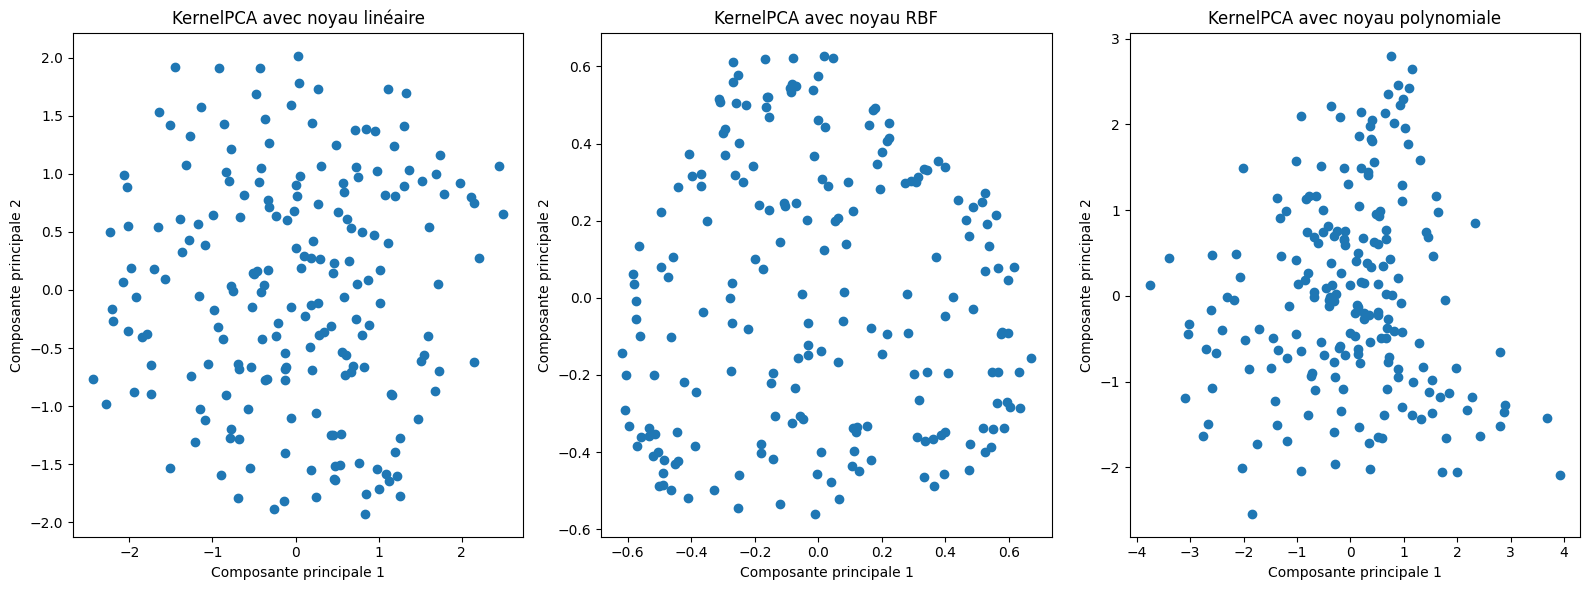

Shape des données transformées (linéaire) : (200, 2)
Shape des données transformées (RBF) : (200, 2)
Shape des données transformées (polynomiale) : (200, 2)


In [216]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Standardiser les données 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Appliquer KernelPCA avec noyau linéaire
transformer_linear = KernelPCA(n_components=2, kernel='linear')
X_transformed_linear = transformer_linear.fit_transform(data_scaled)

# Appliquer KernelPCA avec noyau RBF
transformer_rbf = KernelPCA(n_components=2, kernel='rbf')
X_transformed_rbf = transformer_rbf.fit_transform(data_scaled)


# Appliquer KernelPCA avec noyau polynomiale
transformer_poly = KernelPCA(n_components=2, kernel='poly')
X_transformed_poly = transformer_poly.fit_transform(data_scaled)


fig, axes = plt.subplots(1, 3, figsize=(16, 6))


# Affichage des résultats pour le noyau linéaire
axes[0].scatter(X_transformed_linear[:, 0], X_transformed_linear[:, 1])
axes[0].set_title("KernelPCA avec noyau linéaire")
axes[0].set_xlabel("Composante principale 1")
axes[0].set_ylabel("Composante principale 2")

# Affichage des résultats pour le noyau RBF
axes[1].scatter(X_transformed_rbf[:, 0], X_transformed_rbf[:, 1])
axes[1].set_title("KernelPCA avec noyau RBF")
axes[1].set_xlabel("Composante principale 1")
axes[1].set_ylabel("Composante principale 2")


# Affichage des résultats pour le noyau RBF
axes[2].scatter(X_transformed_poly[:, 0], X_transformed_poly[:, 1])
axes[2].set_title("KernelPCA avec noyau polynomiale")
axes[2].set_xlabel("Composante principale 1")
axes[2].set_ylabel("Composante principale 2")

plt.tight_layout()
plt.show()


# Affichage des dimensions des résultats
print(f"Shape des données transformées (linéaire) : {X_transformed_linear.shape}")
print(f"Shape des données transformées (RBF) : {X_transformed_rbf.shape}")
print(f"Shape des données transformées (polynomiale) : {X_transformed_poly.shape}")




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# Convertir le taux de survie en binaire (1 si survi, 0 si non survie)
y_binary = (data["Taux_survie_%"] > 50).astype(int)  # 1 pour survie, 0 pour non-survie

# Sélectionner une seule caractéristique
X = data[["Age_poulet_jours"]]  # Caractéristique
y = y_binary  # Cible binaire

# Diviser les données en ensemble d'entraînement et de test (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Afficher les résultats
print(f"Prédictions sur l'ensemble de test : {y_pred}")
print(f"Exactitude du modèle : {accuracy_score(y_test, y_pred):.2f}")
print(f"F1-score : {f1_score(y_test, y_pred):.2f}")


On convertit le taux en binaire car Taux_survie_% est une variable continue ce qui provoque une erreur.
On conclut que les poulets survivent car résultat = 1.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Convertir le taux de survie en binaire (1 si survie, 0 si non survie)
y_binary = (data["Taux_survie_%"] > 50).astype(int)  # 1 pour survie, 0 pour non-survie

# Sélectionner les variables d'intérêt
X = data[["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C", "Humidite_%",
          "Age_poulet_jours", "Gain_poids_jour_g", "Taux_survie_%", "Cout_elevage_FCFA"]]  # Variables
y = y_binary

# Diviser les données en ensemble d'entraînement et de test (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer et entraîner le modèle RandomForestClassifier avec une profondeur plus grande
model = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)  
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Afficher les résultats
print(f"Exactitude du modèle : {accuracy_score(y_test, y_pred):.2f}")
print(f"F1-score : {f1_score(y_test, y_pred):.2f}")

# Afficher l'importance des caractéristiques
importances = model.feature_importances_
features = X.columns

# Afficher les importances des caractéristiques
print("\nImportance des caractéristiques :")
for feature, importance in zip(features, importances):
    print(f"Variable: {feature}, Importance: {importance:.4f}")


Exactitude du modèle : 1.00
F1-score : 1.00

Importance des caractéristiques :
Variable: Poids_poulet_g, Importance: 0.0000
Variable: Nourriture_consommee_g_jour, Importance: 0.0000
Variable: Temperature_enclos_C, Importance: 0.0000
Variable: Humidite_%, Importance: 0.0000
Variable: Age_poulet_jours, Importance: 0.0000
Variable: Gain_poids_jour_g, Importance: 0.0000
Variable: Taux_survie_%, Importance: 0.0000
Variable: Cout_elevage_FCFA, Importance: 0.0000


<span style="color : red"> # Identifiez les variables les plus importantes. Quels attributs influencent le plus la 
survie des poulets ? Pourquoi ?</span>


Tous les résultats de l'importance sont à 0, le modèle est probablement trop simple pour pouvoir capturer des relations et des corrélations complexes entre les données.


Sans code on pourrait dire que les variables qui influent le plus sont : Age_poulet_jours, Temperature_enclos_C, Nourriture_consommee_g_jour, Poids_poulet_g, par raisonnement logique et par contexte logique.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Sélectionner les variables d'entrée (caractéristiques)
X = data[["Poids_poulet_g", "Nourriture_consommee_g_jour", "Temperature_enclos_C", "Humidite_%",
          "Age_poulet_jours", "Taux_survie_%", "Cout_elevage_FCFA"]]

# Variable cible (Gain de poids du poulet par jour)
y = data["Gain_poids_jour_g"]

# Diviser les données en ensemble d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle AdaBoost
adaboost = AdaBoostRegressor(n_estimators=100, random_state=0)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# Modèle Gradient Boosting
gradboost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gradboost.fit(X_train, y_train)
y_pred_grad = gradboost.predict(X_test)

# Évaluer les performances
print("Comparaison des modèles\n")
print(f"AdaBoost - MAE : {mean_absolute_error(y_test, y_pred_ada):.2f}, R²: {r2_score(y_test, y_pred_ada):.2f}")
print(f"Gradient Boosting - MAE{mean_absolute_error(y_test, y_pred_grad):.2f}, R²: {r2_score(y_test, y_pred_grad):.2f}")


Comparaison des modèles

AdaBoost - MAE : 4.00, R²: -0.31
Gradient Boosting - MAE4.32, R²: -0.54


<span style="color : red"> # Analysez leurs performances</span>

On remarque que le score MAE est moins élevé avec AdaBoost, et que le score R² se rapproche plus de 1 avec AdaBoost également. Cela signifie donc qu'AdaBoost est plus adapté pour ce dataset, il génère moins d'erreurs sur la globalité des données et capte mieux les données que Gradient Boosting malgré un score R² négatif.

<span style="color : red">Les deux algorithmes réagissent-ils différemment aux outliers ? Expliquez pourquoi</span>

AdaBoost itère le poids à chaque erreur et Gradient Boosting optimise la fonction en construisant un arbre de décizion successif. AdaBoost sera donc généralement plus sensible aux erreurs et Gradient Boosting plus flexible.